# Principal Component Analysis (PCA)


When we need to analyze a large dataset with an high number of of dimensions/features we can use Principal Component Analysis (PCA) to transform this high dimensional data into lower dimensional data.

One of the reasons we should do this is that if we are trying to gain insight from an analysis, having too many predictors could make things more complicated.

Another problem that PCA helps us solve is the multicollinearity.

Multicollinearity is a statistical concept where several independent variables in a model are correlated. It means that some indipendent variables contain the same information about the dependent variable.

PCA allows us to achieve this combining 2 or more variables into components. 

Importing libraries and data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('houses_to_rent.csv')


General information, and preview of first/last five rows, description of datasets

In [2]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,rent amount
0,1,240,3,3,4,0,acept,furnished,8000
1,0,64,2,1,1,10,acept,not furnished,820
2,1,443,5,5,4,3,acept,furnished,7000
3,1,73,2,2,1,12,acept,not furnished,1250
4,1,19,1,1,0,0,not acept,not furnished,1200


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   city            6080 non-null   int64 
 1   area            6080 non-null   int64 
 2   rooms           6080 non-null   int64 
 3   bathroom        6080 non-null   int64 
 4   parking spaces  6080 non-null   int64 
 5   floor           6080 non-null   int64 
 6   animal          6080 non-null   object
 7   furniture       6080 non-null   object
 8   rent amount     6080 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 427.6+ KB


Trasforming String Valiables

In [4]:
df[['animal', 'furniture']] = pd.get_dummies(data=df[['animal', 'furniture']], drop_first=True)

In [5]:
df.head(1)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,rent amount
0,1,240,3,3,4,0,0,0,8000


### Correlation matrix

In [6]:
# Creting df with only predictors
X = df.drop(columns='rent amount', axis=1)

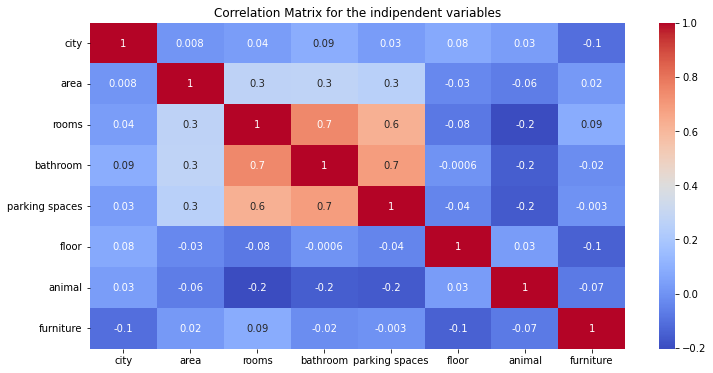

In [7]:
plt.figure(figsize=(12,6))
sns.heatmap(data=X.corr(), annot=True, fmt='.1g', cmap='coolwarm')
plt.title('Correlation Matrix for the indipendent variables')
plt.show()

There is another correlation between some of the independent variables.

### Standardizing Variables

In [8]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Recreating DataFrame
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture
0,1.0,0.009351,0.222222,0.222222,0.333333,0.000000,0.0,0.0
1,0.0,0.002195,0.111111,0.000000,0.083333,0.101010,0.0,1.0
2,1.0,0.017604,0.444444,0.444444,0.333333,0.030303,0.0,0.0
3,1.0,0.002561,0.111111,0.111111,0.083333,0.121212,0.0,1.0
4,1.0,0.000366,0.000000,0.000000,0.000000,0.000000,1.0,1.0


## Principal Component Analysis

Finding the optimal number of components

In [10]:
model = PCA(random_state=42).fit(X_scaled)


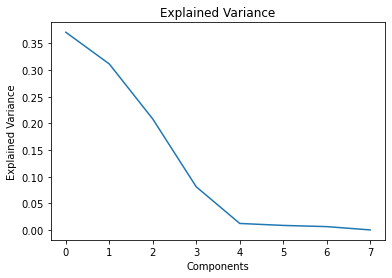

In [11]:
plt.plot(model.explained_variance_ratio_)
plt.title('Explained Variance')
plt.xlabel('Components')
plt.ylabel('Explained Variance')
plt.show()

Starting from the 4th component the marginal explained variance that each component carries is reduced. Therefore 4 seems to be the optimal number of components.

Plotting Cumulative Explained Variance

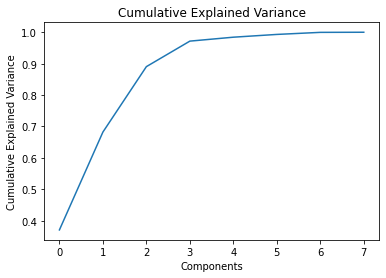

In [12]:
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.title('Cumulative Explained Variance')
plt.xlabel('Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

Again 4 seems to be the optimal number of components.

### Creating the model

In [13]:
model = PCA(n_components=4, random_state=42).fit(X_scaled)

## PCA Interpretation

In [14]:
model_interpretation = pd.DataFrame(model.components_, columns=X.columns)

In [15]:
model_interpretation

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture
0,0.181418,-0.001894,-0.052840,-0.026016,-0.028430,0.020501,0.513750,-0.835731
1,-0.087693,-0.002332,-0.055603,-0.079433,-0.064195,-0.008521,0.847689,0.510033
2,-0.976331,-0.001294,-0.038218,-0.062905,-0.028570,-0.006666,0.009316,-0.201026
3,-0.075883,0.020620,0.487555,0.685306,0.518733,-0.011778,0.131167,-0.005982


In [16]:
model_interpretation.iloc[0]

city              0.181418
area             -0.001894
rooms            -0.052840
bathroom         -0.026016
parking spaces   -0.028430
floor             0.020501
animal            0.513750
furniture        -0.835731
Name: 0, dtype: float64

What most characterizes the first component is that the house is located in the city

In [17]:
model_interpretation.iloc[1]

city             -0.087693
area             -0.002332
rooms            -0.055603
bathroom         -0.079433
parking spaces   -0.064195
floor            -0.008521
animal            0.847689
furniture         0.510033
Name: 1, dtype: float64

The second component is characterized by the fact that animals are acceptedand tht the hause has furniture.

In [18]:
model_interpretation.iloc[2]

city             -0.976331
area             -0.001294
rooms            -0.038218
bathroom         -0.062905
parking spaces   -0.028570
floor            -0.006666
animal            0.009316
furniture        -0.201026
Name: 2, dtype: float64

The third component is characterized by the fact that the houses are not in the city and tend to be small.

In [19]:
model_interpretation.iloc[3]

city             -0.075883
area              0.020620
rooms             0.487555
bathroom          0.685306
parking spaces    0.518733
floor            -0.011778
animal            0.131167
furniture        -0.005982
Name: 3, dtype: float64

The houses of the 4th component are larger and are not in the city

In [20]:
components = model.transform(X_scaled)
components = pd.DataFrame(components, columns=['city charateristics', 'accepts animal and has furniture', 'rural small house', 'high end house'])

In [21]:
components.head()

,city charateristics,accepts animal and has furniture,rural small house,high end house
0,0.512212,-0.606922,0.001389,0.138911
1,-0.484093,0.029839,0.801398,-0.128672
2,0.495294,-0.637207,-0.021295,0.399360
3,-0.305152,-0.066853,-0.182058,-0.128640
4,0.217248,0.802227,-0.158314,-0.169636
